# Setup

## Imports and definitions

In [1]:
import sys

sys.executable


'/home/pia/Documents/KD_Lib/kd_venv/bin/python'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import seaborn as sns
sns.set_theme()
sns.set_palette('bright')
sns.set(rc={'figure.figsize': (11.7, 8.27)})  # landscape A4
# The four preset contexts, in order of relative size, are paper, notebook, talk, and poster
# sns.set_context("notebook")


In [4]:
def preprocess_df(df):
    df = df.iloc[2:]
    df = df.apply(pd.to_numeric)
    df = df.reset_index(drop=True)
    return df


In [5]:
def create_plotting_df(df, col_list):
    new_df = pd.DataFrame()

    for col_name in col_list:
        means = np.array(df[col_name])
        sigmas = np.array(df[str(col_name + ".1")])

        lower_bound = means - sigmas
        upper_bound = means + sigmas

        new_df[col_name] = means
        new_df[str(col_name + "_std")] = sigmas
        new_df[str(col_name + "_lower")] = lower_bound
        new_df[str(col_name + "_upper")] = upper_bound

    return new_df


def create_mean_df(df, col_list, mean_col):
    new_df = pd.DataFrame()
    means = []
    sigmas = []

    for col_name in col_list:
        means.append(np.array(df[col_name]))
        sigmas.append(np.array(df[str(col_name + ".1")]))

    means = np.mean(means, axis=0)
    sigmas = np.mean(sigmas, axis=0)

    lower_bound = means - sigmas
    upper_bound = means + sigmas

    new_df[mean_col] = means
    new_df[str(mean_col + "_std")] = sigmas
    new_df[str(mean_col + "_lower")] = lower_bound
    new_df[str(mean_col + "_upper")] = upper_bound

    return new_df


def plot_df(df, col_list, label_list, ax=None, mean=None, color=None):
    if mean is None:
        plotting_df = create_plotting_df(df, col_list)

        for idx, col_name in enumerate(col_list):
            ax = sns.lineplot(data=plotting_df, x=plotting_df.index,
                            y=plotting_df[col_name], ax=ax, label=label_list[idx], color=color)
            plt.fill_between(plotting_df.index, plotting_df[str(
                col_name + "_lower")], plotting_df[str(col_name + "_upper")], alpha=.2, color=ax.get_lines()[-1].get_color())
    if isinstance(mean, str):
        plotting_df = create_mean_df(df, col_list, mean)
        ax = sns.lineplot(data=plotting_df, x=plotting_df.index,
                        y=plotting_df[mean], ax=ax, label=mean, color=color)
        plt.fill_between(plotting_df.index, plotting_df[str(
            mean + "_lower")], plotting_df[str(mean + "_upper")], alpha=.2, color=ax.get_lines()[-1].get_color())

    return ax


## Read and pre-process DataFrames

In [34]:
# Loss summands
old_ce_df = pd.read_csv("Experiments/calibration2/ce.csv")
ce_df = pd.read_csv("Experiments/replicate1/vanilla_teacher18/vanilla.csv")
kld_df = pd.read_csv("Experiments/replicate1/KLD_only/kld.csv")

# First benchmark
# vanilla_df = pd.read_csv("Experiments/session3/vanilla.csv")
# vanilla_df = pd.read_csv("Experiments/calibration1/vanilla.csv")
# dml_df = pd.read_csv("Experiments/calibration1/dml.csv")
# dmle_df = pd.read_csv("Experiments/calibration1/dml_e.csv")
# tfkd_df = pd.read_csv("Experiments/calibration1/tfkd.csv")
base_df = pd.read_csv("Experiments/calibration3/vanilla.csv")

# Final hyperparameters
vanilla_df = pd.read_csv("Experiments/final_hyperparams/vanilla.csv")
dml_df = pd.read_csv("Experiments/final_hyperparams/dml.csv")
dmle_df = pd.read_csv("Experiments/final_hyperparams/dml_e.csv")
tfkd_df = pd.read_csv("Experiments/final_hyperparams/tfkd.csv")
old_tfkd_df = pd.read_csv("Experiments/calibration1/tfkd.csv")

In [35]:
vanilla_df = preprocess_df(vanilla_df)
dml_df = preprocess_df(dml_df)
dmle_df = preprocess_df(dmle_df)
tfkd_df = preprocess_df(tfkd_df)
# new_tfkd_df = preprocess_df(new_tfkd_df)
base_df = preprocess_df(base_df)
old_ce_df = preprocess_df(old_ce_df)
ce_df = preprocess_df(ce_df)
kld_df = preprocess_df(kld_df)
old_tfkd_df = preprocess_df(old_tfkd_df)


In [22]:
keep_vanilla = ["Accuracy/Validation teacher", "Accuracy/Validation student"]
labels_vanilla = ["KD Teacher", "KD Student"]

keep_dml = [] # ["Accuracy/Validation student0", "Accuracy/Validation student1", "Accuracy/Validation student2"]
labels_dml = [] # ["Student 1", "Student 2", "Student 3"]
for i in range(3):
    keep_dml.append("Accuracy/Validation student{}".format(i))
    labels_dml.append("Student {}".format(i+1))
best_dml = ["Accuracy/Best student"]


# Plotting with seaborn

## Validation accuracy

In [9]:
# custom_palette = sns.color_palette('deep')[:3] + [sns.color_palette('deep')[4]] + sns.color_palette('deep')[6:]
# sns.set_palette(custom_palette)
palette = sns.color_palette('deep')
palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

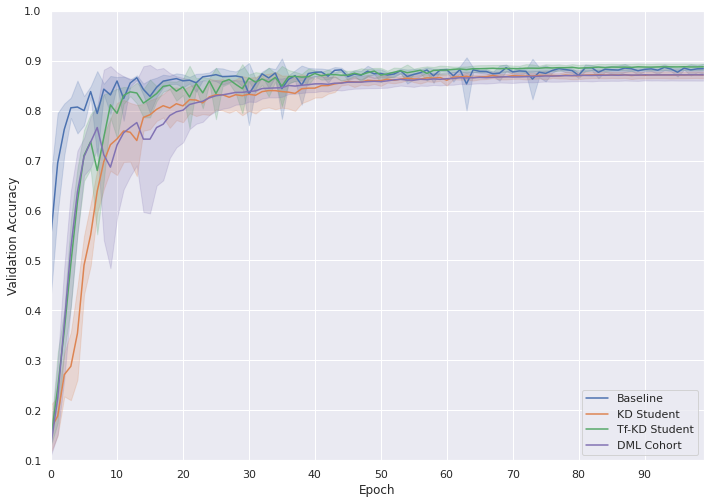

In [11]:
# sns.set_palette(sns.color_palette('deep')) #[:3] + [sns.color_palette('deep')[4]] + sns.color_palette('deep')[6:])
# ax = plot_df(base_df, [keep_vanilla[0]], ["Baseline"], color=palette[0])
# ax = plot_df(vanilla_df, keep_vanilla[1:], labels_vanilla[1:], ax=ax, color=palette[1])
# ax = plot_df(tfkd_df, [keep_vanilla[1]], ["Tf-KD Student"], ax=ax, color=palette[2])
# ax = plot_df(dml_df, keep_dml, labels_dml, ax=ax, mean="DML Cohort", color=palette[4])
# # ax = plot_df(dml_df, [keep_dml[-1]], ["DML Best"], color=palette[6])
# # ax = plot_df(dml_df, best_dml, ["DML Best"], color=palette[6])
# # ax = plot_df(new_tfkd_df, [keep_vanilla[1]], ["Tf-KD Student w/o smoothing"], ax=ax)

# ax.set(xlabel='Epoch', ylabel='Validation Accuracy')
# ax.set_ylim(0.1, 1)
# ax.set_xlim(0, 99)
# ax.set_xticks([i for i in range(0, 100, 10)])
# ax.legend(title='', loc='lower right')  # bbox_to_anchor=[1.2,1.0]

# plt.savefig("/home/pia/Pictures/Plots/Thesis/benchmark2.pdf", bbox_inches="tight")
# plt.savefig("/home/pia/Pictures/Plots/Thesis/benchmark2.png", bbox_inches="tight")


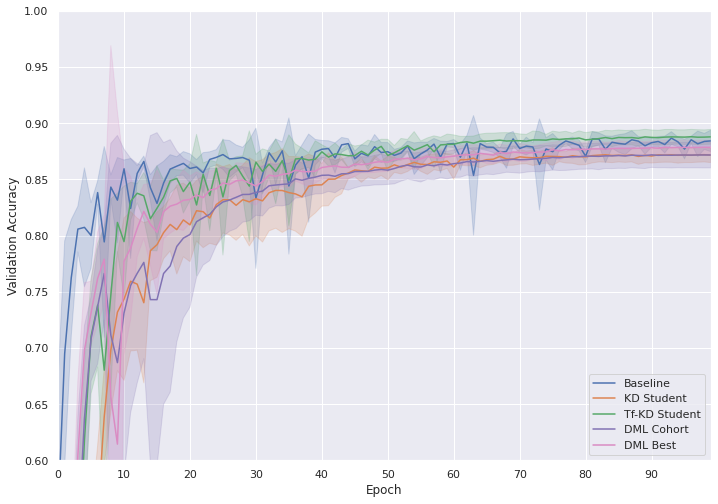

In [88]:
# sns.set_palette(sns.color_palette('deep')) #[:3] + [sns.color_palette('deep')[4]] + sns.color_palette('deep')[6:])
# ax = plot_df(base_df, [keep_vanilla[0]], ["Baseline"], color=palette[0])
# ax = plot_df(vanilla_df, keep_vanilla[1:], labels_vanilla[1:], ax=ax, color=palette[1])
# ax = plot_df(tfkd_df, [keep_vanilla[1]], ["Tf-KD Student"], ax=ax, color=palette[2])
# ax = plot_df(dml_df, keep_dml, labels_dml, ax=ax, mean="DML Cohort", color=palette[4])
# # ax = plot_df(dml_df, [keep_dml[-1]], ["DML Best"], color=palette[6])
# ax = plot_df(dml_df, best_dml, ["DML Best"], color=palette[6])
# # ax = plot_df(new_tfkd_df, [keep_vanilla[1]], ["Tf-KD Student w/o smoothing"], ax=ax)

# ax.set(xlabel='Epoch', ylabel='Validation Accuracy')
# ax.set_ylim(0.6, 1)
# ax.set_xlim(0, 99)
# ax.set_xticks([i for i in range(0, 100, 10)])
# ax.legend(title='', loc='lower right')  # bbox_to_anchor=[1.2,1.0]

# plt.savefig("/home/pia/Pictures/Plots/Thesis/benchmark2.pdf", bbox_inches="tight")
# plt.savefig("/home/pia/Pictures/Plots/Thesis/benchmark2.png", bbox_inches="tight")

In [72]:
dml_palette = sns.light_palette("tab:purple", reverse=True)
dml_palette

[(0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.653289041199532, 0.5116641639899728, 0.7824986487719783),
 (0.7261859255363189, 0.6194067593524948, 0.8238208269557212),
 (0.7990828098731056, 0.7271493547150166, 0.8651430051394642),
 (0.8719796942098925, 0.8348919500775386, 0.9064651833232072),
 (0.9448765785466794, 0.9426345454400604, 0.9477873615069502)]

In [130]:
# DML modifications
session_name = "baseline_adamw"
dml_df = pd.read_csv(f"Experiments/hyperparams/{session_name}/dml.csv")
dml_df = preprocess_df(dml_df)

keep_dml = [] # ["Accuracy/Validation student0", "Accuracy/Validation student1", "Accuracy/Validation student2"]
labels_dml = [] # ["Student 1", "Student 2", "Student 3"]
for i in range(3):
    keep_dml.append("Accuracy/Validation student{}".format(i))
    labels_dml.append("Student {}".format(i+1))
best_dml = ["Accuracy/Best student"]

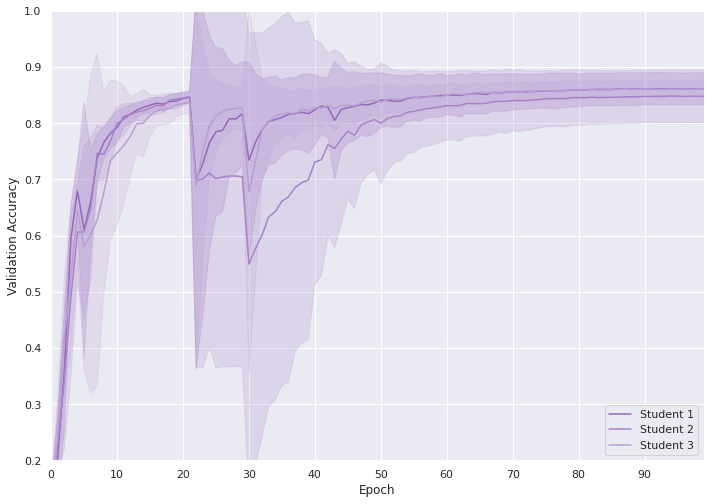

In [131]:
sns.set_palette(dml_palette)
ax = plot_df(dml_df, keep_dml, labels_dml)

ax.set(xlabel='Epoch', ylabel='Validation Accuracy')
ax.set_ylim(0.45, 1)
ax.set_xlim(1, 100)
# bbox_to_anchor=[1.2,1.0]
ax.legend(title='Student Cohort', loc='lower right')

ax.set_ylim(0.2, 1)
ax.set_xlim(0, 99)
ax.set_xticks([i for i in range(0, 100, 10)])
ax.legend(title='', loc='lower right')  # bbox_to_anchor=[1.2,1.0]

img_name = "dml-cohort_" + session_name
plt.savefig(f"/home/pia/Pictures/Plots/Thesis/{img_name}.pdf", bbox_inches="tight")
plt.savefig(f"/home/pia/Pictures/Plots/Thesis/{img_name}.png", bbox_inches="tight")

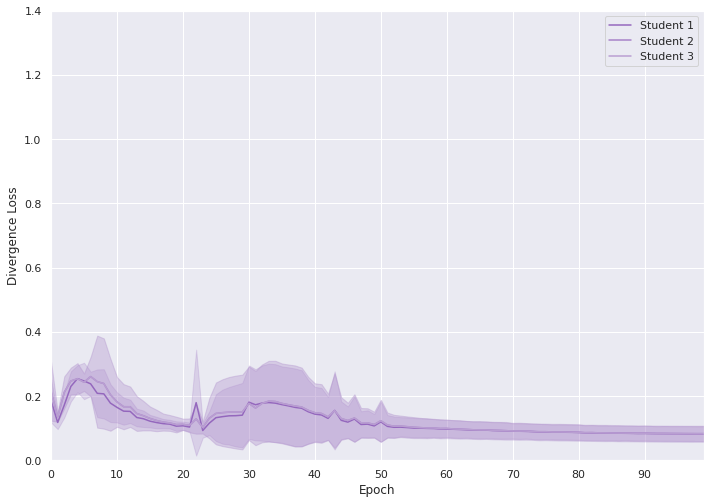

In [132]:
loss_dml_kld = ["Loss/Divergence student0", "Loss/Divergence student2", "Loss/Divergence student2"]
ax = plot_df(dml_df, loss_dml_kld, labels_dml)

ax.set(xlabel='Epoch', ylabel='Divergence Loss')
ax.set_ylim(0.45, 1)
ax.set_xlim(1, 100)
# bbox_to_anchor=[1.2,1.0]
ax.legend(title='Student Cohort', loc='lower right')

ax.set_ylim(0.0, 1.4)
ax.set_xlim(0, 99)
ax.set_xticks([i for i in range(0, 100, 10)])
ax.legend(title='', loc='upper right')  # bbox_to_anchor=[1.2,1.0]

img_name = "dml-cohort_" + session_name
plt.savefig(f"/home/pia/Pictures/Plots/Thesis/{img_name}_div.pdf", bbox_inches="tight")
plt.savefig(f"/home/pia/Pictures/Plots/Thesis/{img_name}_div.png", bbox_inches="tight")

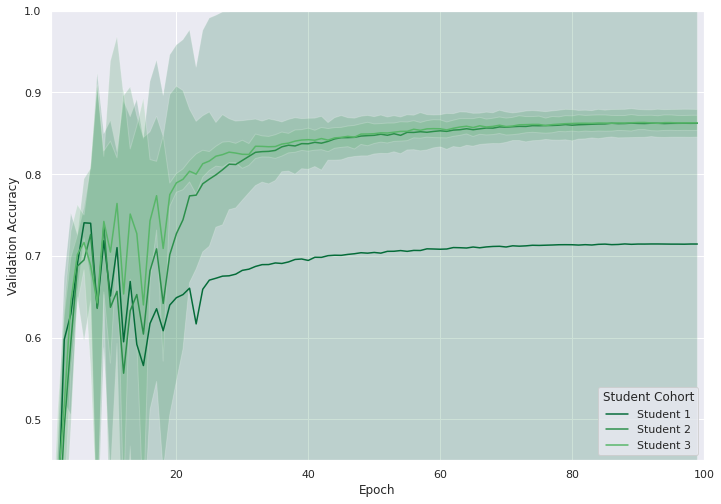

In [50]:
ax = plot_df(dmle_df, keep_dml, labels_dml)
ax.set(xlabel='Epoch', ylabel='Validation Accuracy')

ax.set_ylim(0.45, 1)
ax.set_xlim(1, 100)
# bbox_to_anchor=[1.2,1.0]
ax.legend(title='Student Cohort', loc='lower right')


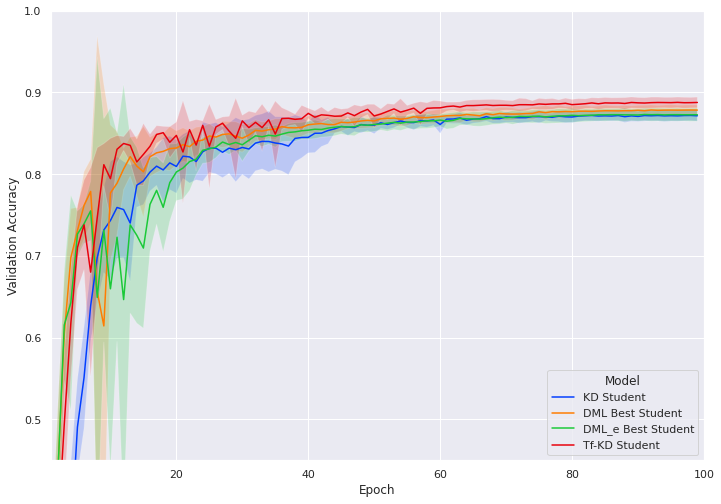

In [52]:
sns.set_palette('bright')

best_dml = ["Accuracy/Best student"]
ax = plot_df(vanilla_df, keep_vanilla[1:], labels_vanilla[1:])
ax = plot_df(dml_df, best_dml, ["DML Best Student"])
ax = plot_df(dmle_df, best_dml, ["DML_e Best Student"])
ax = plot_df(new_tfkd_df, [keep_vanilla[1]], ["Tf-KD Student"], ax=ax)
ax.set(xlabel='Epoch', ylabel='Validation Accuracy')

ax.set_ylim(0.45, 1)
ax.set_xlim(1, 100)
# bbox_to_anchor=[1.2,1.0]
ax.legend(title='Model', loc='lower right')


## Loss functions

In [10]:
loss_student = ["Loss/Cross-entropy student", "Loss/Divergence student",
                "Loss/Entropy student", "Loss/Calibration student"] # "Loss/Calibration teacher"
loss_dml = ["Loss/Cross-entropy student0", "Loss/Divergence student0", "Loss/Entropy student0", "Loss/Calibration student0",
            "Loss/Cross-entropy student1", "Loss/Divergence student1", "Loss/Entropy student1", "Loss/Calibration student1",
            "Loss/Cross-entropy student2", "Loss/Divergence student2", "Loss/Entropy student2", "Loss/Calibration student2"]

loss_labels = ["Cross-entropy", "Divergence",
               "Entropy", "Calibration"] # "Calibration Teacher"
loss_labels_dml = ["Cross-entropy 1", "Divergence 1", "Entropy 1", "Calibration 1",
                   "Cross-entropy 2", "Divergence 2", "Entropy 2", "Calibration 2",
                   "Cross-entropy 3", "Divergence 3", "Entropy 3", "Calibration 3"]


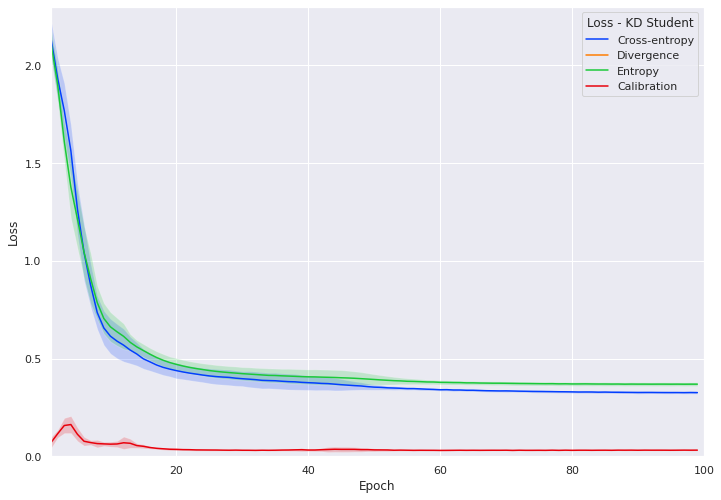

In [65]:
sns.set_palette('bright')

ax = plot_df(vanilla_df, loss_student, loss_labels)
ax.set(xlabel='Epoch', ylabel='Loss')
ax.set_ylim(0.0, 2.3)
ax.set_xlim(1, 100)
ax.legend(title='Loss - KD Student', loc='upper right')


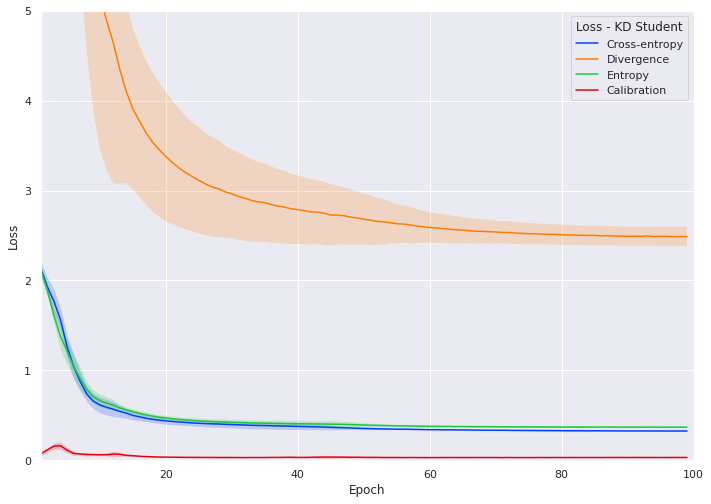

In [26]:
sns.set_palette('bright')

ax = plot_df(vanilla_df, loss_student, loss_labels)
ax.set(xlabel='Epoch', ylabel='Loss')
ax.set_ylim(0.0, 5)
ax.set_xlim(1, 100)
ax.legend(title='Loss - KD Student', loc='upper right')

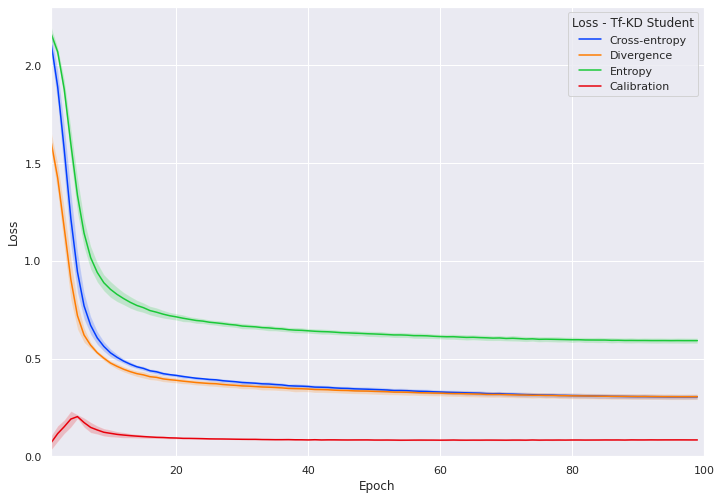

In [66]:
ax = plot_df(new_tfkd_df, loss_student, loss_labels)
ax.set(xlabel='Epoch', ylabel='Loss')
ax.set_ylim(0.0, 2.3)
ax.set_xlim(1, 100)
ax.legend(title='Loss - Tf-KD Student', loc='upper right')


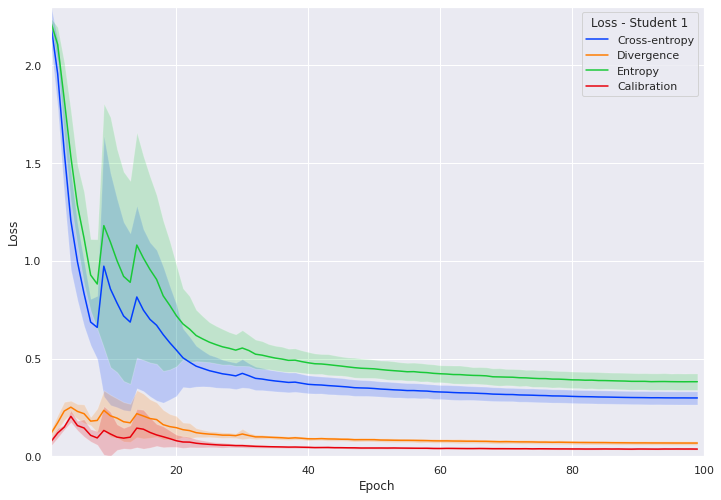

In [27]:
ax = plot_df(dml_df, loss_dml[:4], loss_labels)
ax.set(xlabel='Epoch', ylabel='Loss')
ax.set_ylim(0.0, 2.3)
ax.set_xlim(1, 100)
# bbox_to_anchor=[1.2,1.0]
ax.legend(title='Loss - Student 1', loc='upper right')


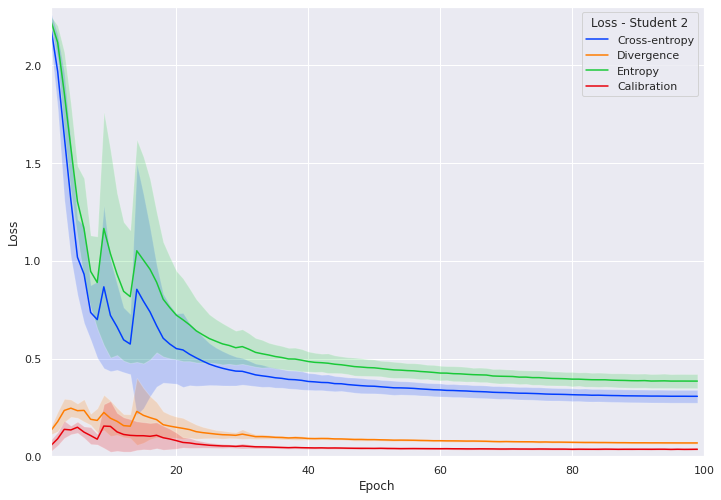

In [28]:
ax = plot_df(dml_df, loss_dml[4:8], loss_labels)
ax.set(xlabel='Epoch', ylabel='Loss')
ax.set_ylim(0.0, 2.3)
ax.set_xlim(1, 100)
# bbox_to_anchor=[1.2,1.0]
ax.legend(title='Loss - Student 2', loc='upper right')


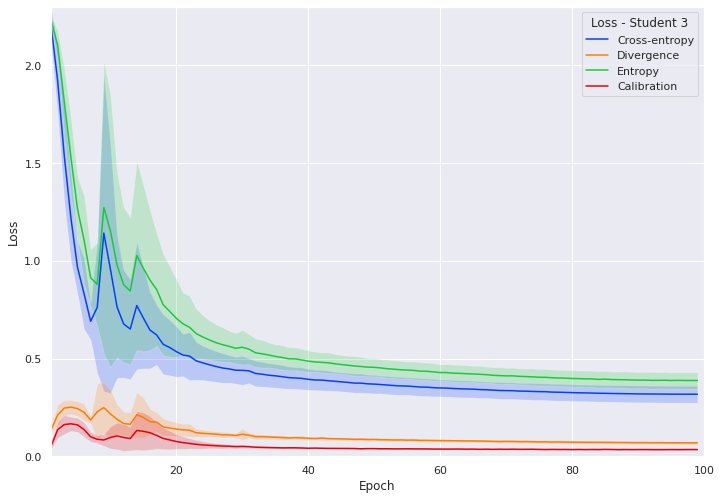

In [29]:
ax = plot_df(dml_df, loss_dml[8:], loss_labels)
ax.set(xlabel='Epoch', ylabel='Loss')
ax.set_ylim(0.0, 2.3)
ax.set_xlim(1, 100)
# bbox_to_anchor=[1.2,1.0]
ax.legend(title='Loss - Student 3', loc='upper right')


## Direct comparisons

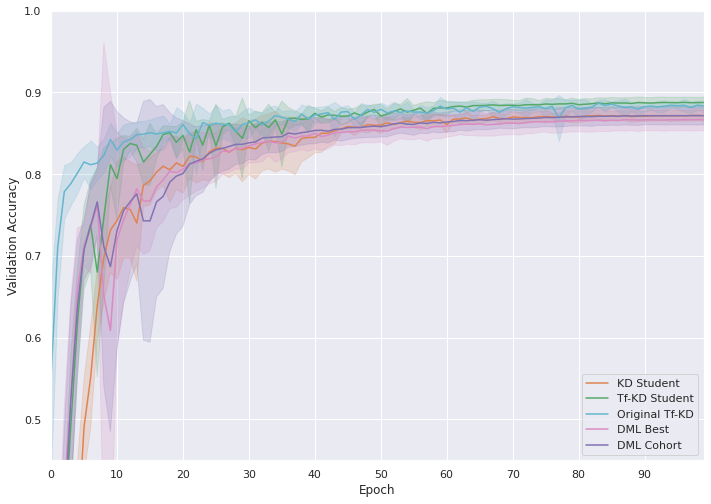

In [19]:
# sns.set_palette("Accent_r")

ax = plot_df(vanilla_df, [keep_vanilla[1]], [labels_vanilla[1]], color=palette[1])
ax = plot_df(tfkd_df, [keep_vanilla[1]], ["Tf-KD Student"], ax=ax, color=palette[2])
ax = plot_df(old_tfkd_df, [keep_vanilla[1]], ["Original Tf-KD"], ax=ax, color=palette[-1])
ax = plot_df(dml_df, [keep_dml[-1]], ["DML Best"], ax=ax, color=palette[6])
ax = plot_df(dml_df, keep_dml, labels_dml, ax=ax, mean="DML Cohort", color=palette[4])

ax.set(xlabel='Epoch', ylabel='Validation Accuracy')
ax.set_ylim(0.45, 1)
ax.set_xlim(0, 99)
ax.set_xticks([i for i in range(0, 100, 10)])
ax.legend(title='', loc='lower right')  # bbox_to_anchor=[1.2,1.0]


In [38]:
# Hacky, but works: used loss_dml_...[-1] for benchmark1, and loss_dml_...[0] for benchmark2

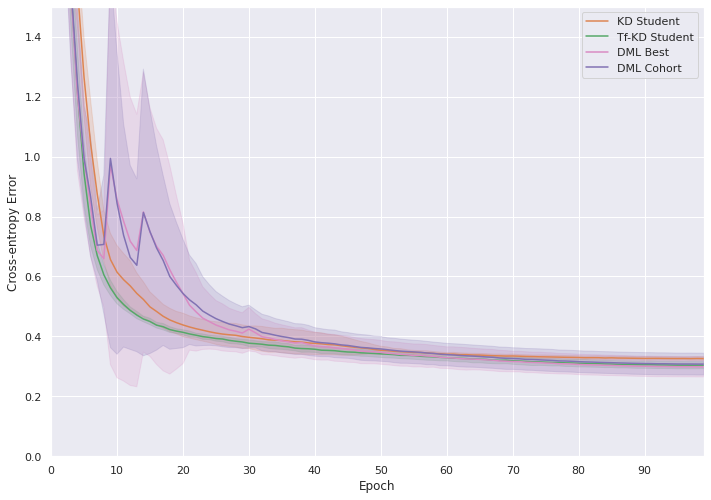

In [13]:
loss_dml_ce = ["Loss/Cross-entropy student0", "Loss/Cross-entropy student1", "Loss/Cross-entropy student2"]

ax = plot_df(vanilla_df, [loss_student[0]], ["KD Student"], color=palette[1])
ax = plot_df(tfkd_df, [loss_student[0]], ["Tf-KD Student"], ax=ax, color=palette[2])
# ax = plot_df(old_tfkd_df, [loss_student[0]], ["Original Tf-KD"], ax=ax, color=palette[-1])
ax = plot_df(dml_df, [loss_dml_ce[0]], ["DML Best"], ax=ax, color=palette[6])
ax = plot_df(dml_df, loss_dml_ce, loss_labels_dml, ax=ax, mean="DML Cohort", color=palette[4])

ax.set(xlabel='Epoch', ylabel='Cross-entropy Error')
ax.legend(title='', loc='upper right')
ax.set_ylim(0.0, 1.5)
ax.set_xlim(0, 99)
ax.set_xticks([i for i in range(0, 100, 10)])

plt.savefig("/home/pia/Pictures/Plots/Thesis/benchmark2_ce.pdf", bbox_inches="tight")
plt.savefig("/home/pia/Pictures/Plots/Thesis/benchmark2_ce.png", bbox_inches="tight")

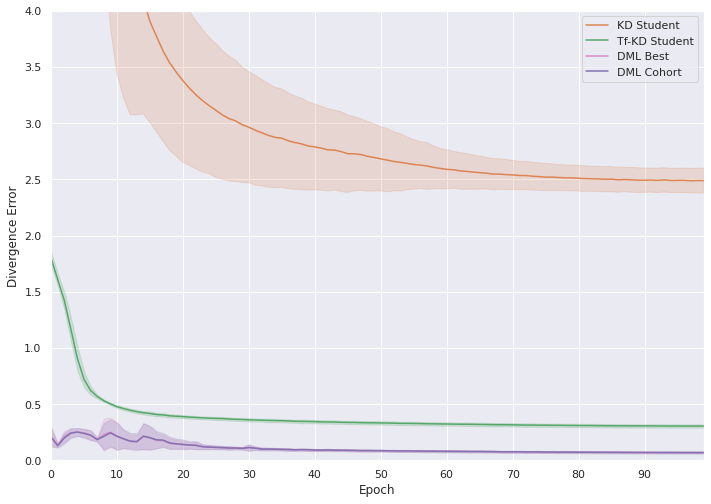

In [15]:
loss_dml_kld = ["Loss/Divergence student0", "Loss/Divergence student2", "Loss/Divergence student2"]

ax = plot_df(vanilla_df, [loss_student[1]], ["KD Student"], color=palette[1])
ax = plot_df(tfkd_df, [loss_student[1]], ["Tf-KD Student"], ax=ax, color=palette[2])
# ax = plot_df(old_tfkd_df, [loss_student[1]], ["Original Tf-KD"], ax=ax, color=palette[-1])
ax = plot_df(dml_df, [loss_dml_kld[-1]], ["DML Best"], ax=ax, color=palette[6])
ax = plot_df(dml_df, loss_dml_kld, loss_labels_dml, ax=ax, mean="DML Cohort", color=palette[4])

ax.set(xlabel='Epoch', ylabel='Divergence Error')
ax.legend(title='', loc='upper right')
ax.set_ylim(0.0, 4.0)
ax.set_xlim(0, 99)
ax.set_xticks([i for i in range(0, 100, 10)])

plt.savefig("/home/pia/Pictures/Plots/Thesis/benchmark2_div.pdf", bbox_inches="tight")
plt.savefig("/home/pia/Pictures/Plots/Thesis/benchmark2_div.png", bbox_inches="tight")

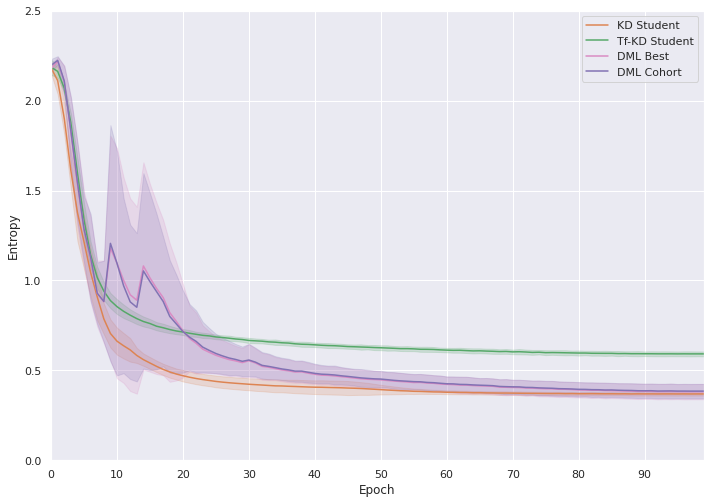

In [16]:
loss_dml_ent = ["Loss/Entropy student0", "Loss/Entropy student1", "Loss/Entropy student2"]

ax = plot_df(vanilla_df, [loss_student[2]], ["KD Student"], color=palette[1])
ax = plot_df(tfkd_df, [loss_student[2]], ["Tf-KD Student"], ax=ax, color=palette[2])
# ax = plot_df(old_tfkd_df, [loss_student[2]], ["Original Tf-KD"], ax=ax, color=palette[-1])
ax = plot_df(dml_df, [loss_dml_ent[0]], ["DML Best"], ax=ax, color=palette[6])
ax = plot_df(dml_df, loss_dml_ent, loss_labels_dml, ax=ax, mean="DML Cohort", color=palette[4])

ax.set(xlabel='Epoch', ylabel='Entropy')
ax.legend(title='', loc='upper right')
ax.set_ylim(0.0, 2.5)
ax.set_xlim(0, 99)
ax.set_xticks([i for i in range(0, 100, 10)])

plt.savefig("/home/pia/Pictures/Plots/Thesis/benchmark2_ent.pdf", bbox_inches="tight")
plt.savefig("/home/pia/Pictures/Plots/Thesis/benchmark2_ent.png", bbox_inches="tight")

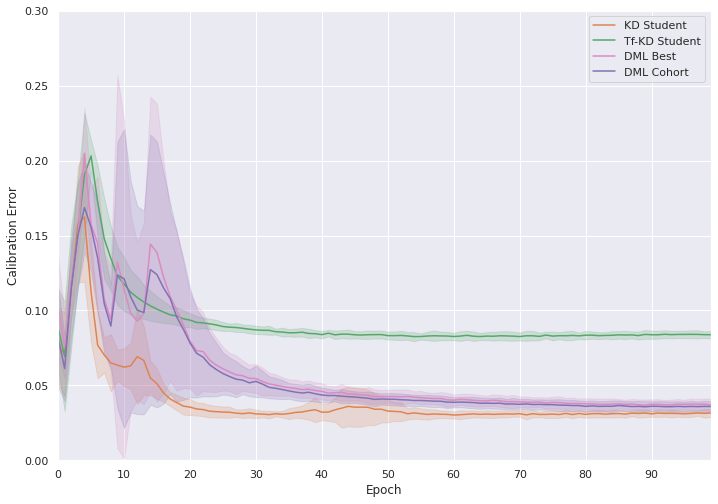

In [19]:
loss_dml_cal = ["Loss/Calibration student0", "Loss/Calibration student1", "Loss/Calibration student2"]

ax = plot_df(vanilla_df, [loss_student[3]], ["KD Student"], color=palette[1])
ax = plot_df(tfkd_df, [loss_student[3]], ["Tf-KD Student"], ax=ax, color=palette[2])
# ax = plot_df(old_tfkd_df, [loss_student[3]], ["Original Tf-KD"], ax=ax, color=palette[-1])
ax = plot_df(dml_df, [loss_dml_cal[0]], ["DML Best"], ax=ax, color=palette[6])
ax = plot_df(dml_df, loss_dml_cal, loss_labels_dml, ax=ax, mean="DML Cohort", color=palette[4])

ax.set(xlabel='Epoch', ylabel='Calibration Error')
ax.legend(title='', loc='upper right')
ax.set_ylim(0.0, 0.3)
ax.set_xlim(0, 99)
ax.set_xticks([i for i in range(0, 100, 10)])

plt.savefig("/home/pia/Pictures/Plots/Thesis/benchmark2_cal.pdf", bbox_inches="tight")
plt.savefig("/home/pia/Pictures/Plots/Thesis/benchmark2_cal.png", bbox_inches="tight")

### Miscellaneous

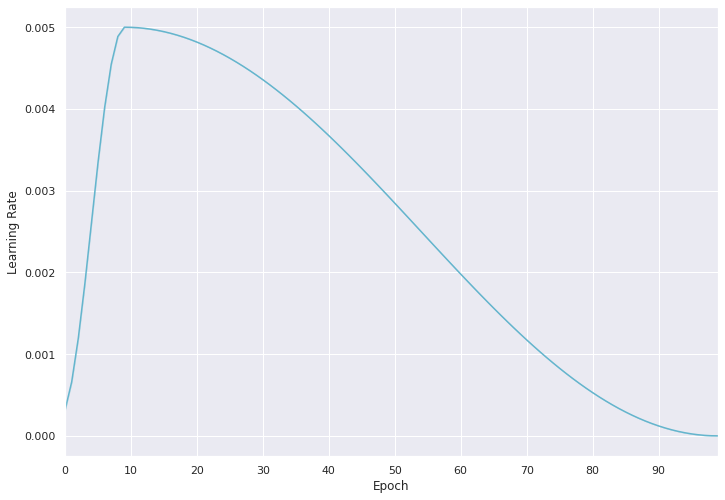

In [60]:
ax = plot_df(vanilla_df, ["Optimizer/lr student"], [""], color=palette[-1])
ax.set(xlabel='Epoch', ylabel='Learning Rate')
ax.set_xlim(0, 99)
ax.set_xticks([i for i in range(0, 100, 10)])

plt.savefig("/home/pia/Pictures/Plots/Thesis/learning_rate.pdf", bbox_inches="tight")
plt.savefig("/home/pia/Pictures/Plots/Thesis/learning_rate.png", bbox_inches="tight")

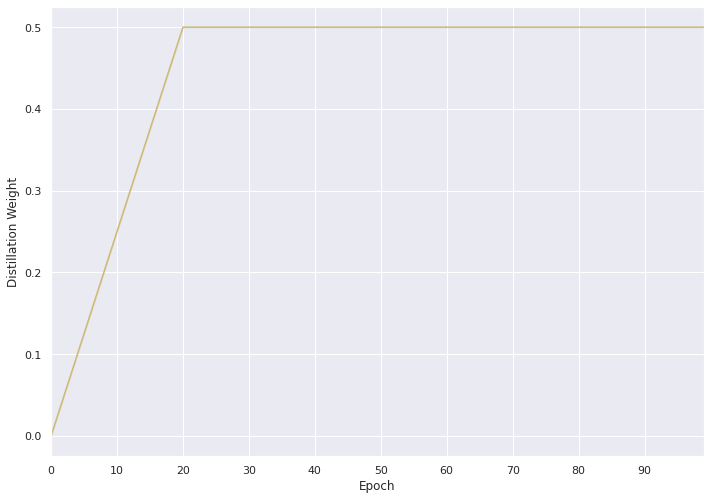

In [63]:
dml_hyperparam_df = pd.read_csv("Experiments/hyperparams/adamw-001-10-True/dml.csv")
dml_hyperparam_df = preprocess_df(dml_hyperparam_df)

ax = plot_df(dml_hyperparam_df, ["Optimizer/Distillation weight"], [""], color=palette[-2])
ax.set(xlabel='Epoch', ylabel='Distillation Weight')
ax.set_xlim(0, 99)
ax.set_xticks([i for i in range(0, 100, 10)])

plt.savefig("/home/pia/Pictures/Plots/Thesis/distil_weight.pdf", bbox_inches="tight")
plt.savefig("/home/pia/Pictures/Plots/Thesis/distil_weight.png", bbox_inches="tight")

# Greater than the Sum of its Parts?

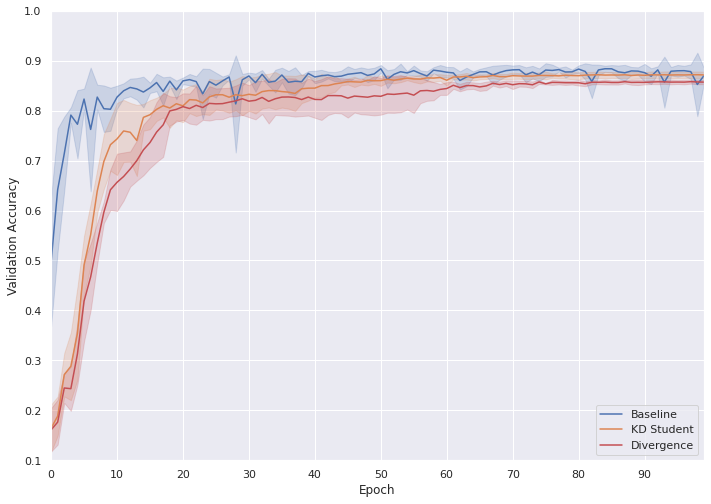

In [39]:
ax = plot_df(ce_df, [keep_vanilla[0]], ["Baseline"], color=palette[0])
ax = plot_df(vanilla_df, keep_vanilla[1:], labels_vanilla[1:], ax=ax, color=palette[1])
ax = plot_df(kld_df, [keep_vanilla[1]], ["Divergence"], color=palette[3], ax=ax)

ax.set(xlabel='Epoch', ylabel='Validation Accuracy')
ax.set_ylim(0.1, 1)
ax.set_xlim(0, 99)
ax.set_xticks([i for i in range(0, 100, 10)])
ax.legend(title='', loc='lower right')  # bbox_to_anchor=[1.2,1.0]

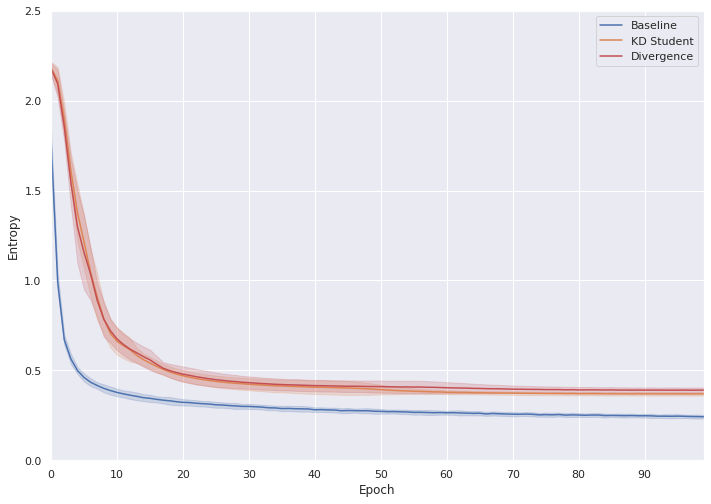

In [40]:
ax = plot_df(old_ce_df, ["Loss/Entropy student"], ["Baseline"], color=palette[0])
ax = plot_df(vanilla_df, [loss_student[2]], ["KD Student"], color=palette[1], ax=ax)
ax = plot_df(kld_df, [loss_student[2]], ["Divergence"], color=palette[3], ax=ax)

ax.set(xlabel='Epoch', ylabel='Entropy')
ax.legend(title='', loc='upper right')
ax.set_ylim(0.0, 2.5)
ax.set_xlim(0, 99)
ax.set_xticks([i for i in range(0, 100, 10)])


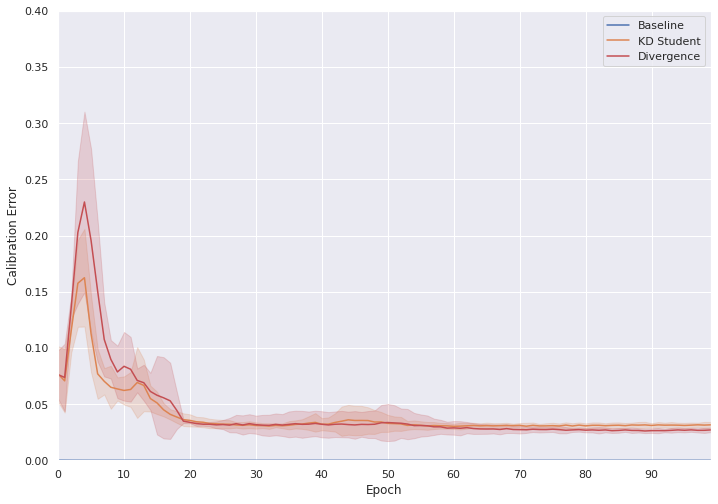

In [41]:
ax = plot_df(ce_df, ["Loss/Calibration teacher"], ["Baseline"], color=palette[0])
ax = plot_df(vanilla_df, [loss_student[3]], ["KD Student"], color=palette[1], ax=ax)
ax = plot_df(kld_df, [loss_student[3]], ["Divergence"], color=palette[3], ax=ax)

ax.set(xlabel='Epoch', ylabel='Calibration Error')
ax.legend(title='', loc='upper right')
ax.set_ylim(0.0, 0.4)
ax.set_xlim(0, 99)
ax.set_xticks([i for i in range(0, 100, 10)])


(1.0, 100.0)

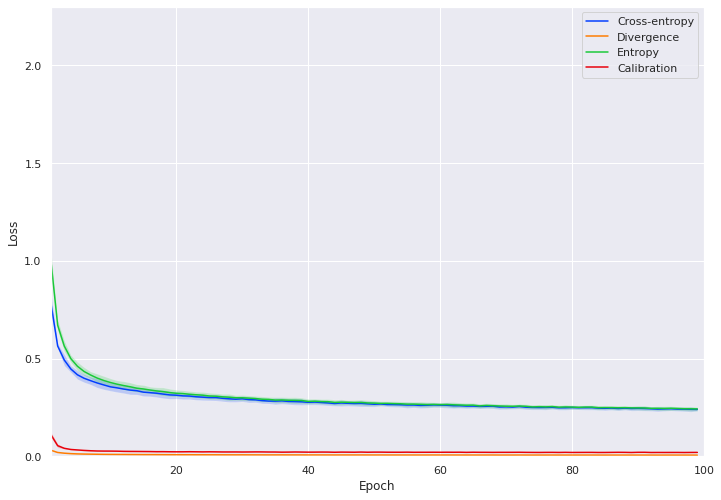

In [28]:
ax = plot_df(ce_df, loss_student, loss_labels)
ax.set(xlabel='Epoch', ylabel='Loss')
ax.set_ylim(0.0, 2.3)
ax.set_xlim(1, 100)


(1.0, 100.0)

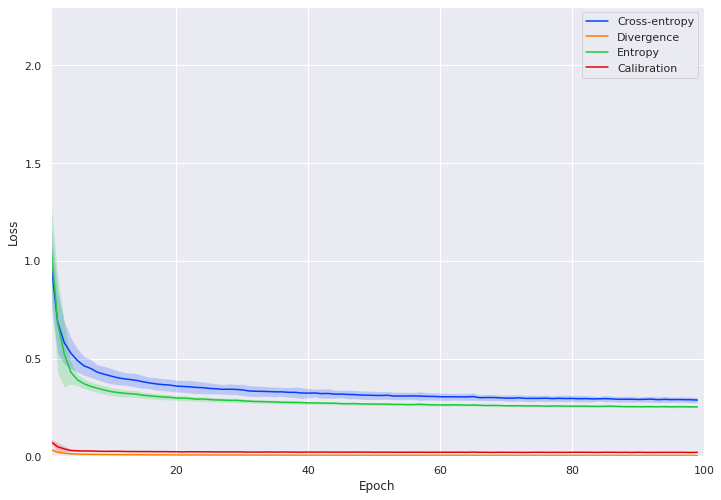

In [29]:
ax = plot_df(kld_df, loss_student, loss_labels)
ax.set(xlabel='Epoch', ylabel='Loss')
ax.set_ylim(0.0, 2.3)
ax.set_xlim(1, 100)


# Plotting for presentations

In [30]:
def softmax(vec):
  exponential = np.exp(vec)
  probabilities = exponential / np.sum(exponential)
  return probabilities

[Text(0.5, 0, 'Class'), Text(0, 0.5, 'Label')]

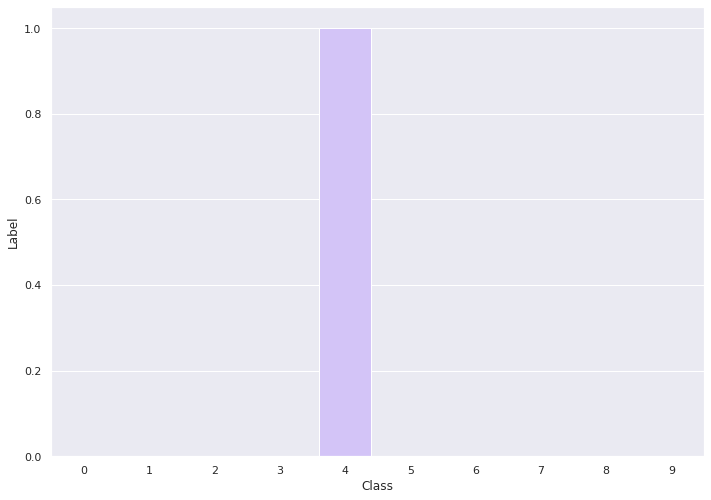

In [45]:
labels = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
ax = sns.barplot(x=[i for i in range(10)], y=labels, color=sns.color_palette("pastel")[4])
ax.set(xlabel='Class', ylabel='Label')

In [32]:
import random
# handcrafted = [0.1, 0.1, 0.9, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
random_dist = [random.uniform(0, 10) for _ in range(10)]

[Text(0.5, 0, 'Class'), Text(0, 0.5, 'Logit')]

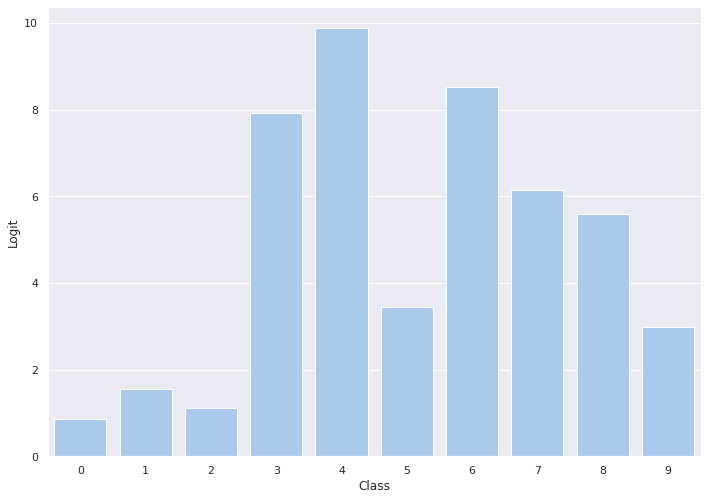

In [33]:
ax = sns.barplot(x=[i for i in range(10)], y=random_dist, color=sns.color_palette("pastel")[0])
ax.set(xlabel='Class', ylabel='Logit')

(0.0, 1.0)

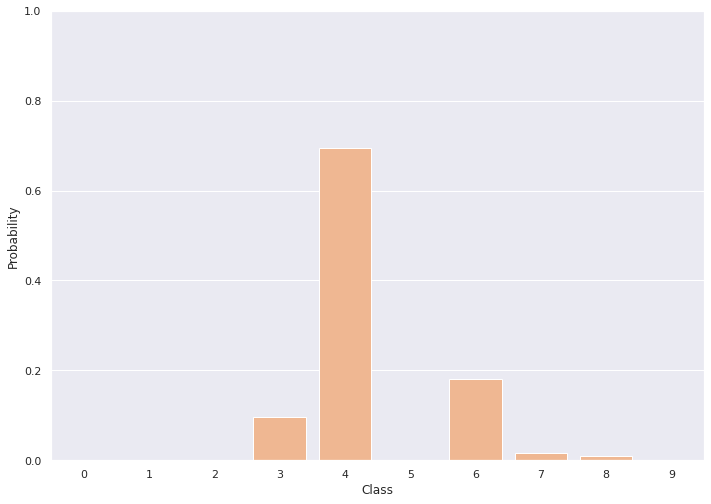

In [34]:
ax = sns.barplot(x=[i for i in range(10)], y=softmax(random_dist), color=sns.color_palette("pastel")[1])
ax.set(xlabel='Class', ylabel='Probability')
ax.set_ylim(0.0, 1.0)

(0.0, 0.5)

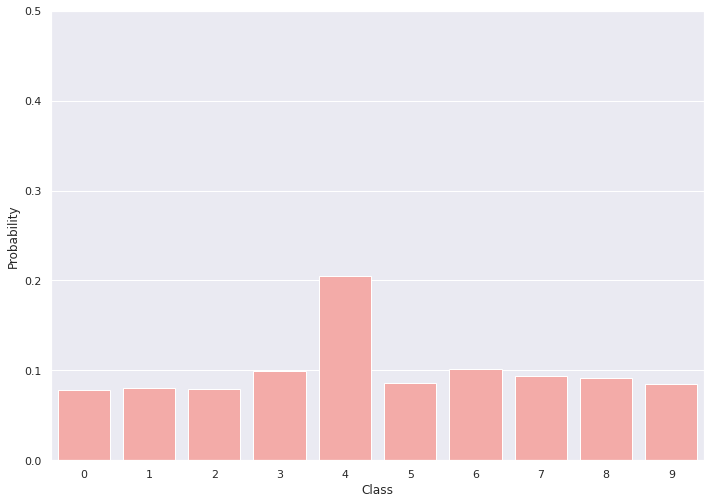

In [36]:
teacher = [random_dist[i] / 3 if i != 4 else random_dist[i] for i in range(10)]
ax = sns.barplot(x=[i for i in range(10)], y=softmax([i/10 for i in teacher]), color=sns.color_palette("pastel")[3])
ax.set(xlabel='Class', ylabel='Probability')
ax.set_ylim(0.0, 0.5)

In [37]:
plot_data = pd.DataFrame()
plot_data["classes"] = [i for i in range(10)]
plot_data["Logits"] = random_dist
plot_data["Softmax"] = softmax(random_dist)
# plot_data["Temperature Smoothing"] = softmax([i/10 for i in random_dist])

In [38]:
melt_plot_data = pd.melt(plot_data, id_vars="classes")
melt_plot_data.head()

,classes,variable,value
0,0,Logits,0.864659
1,1,Logits,1.549721
2,2,Logits,1.119464
3,3,Logits,7.915806
4,4,Logits,9.879880


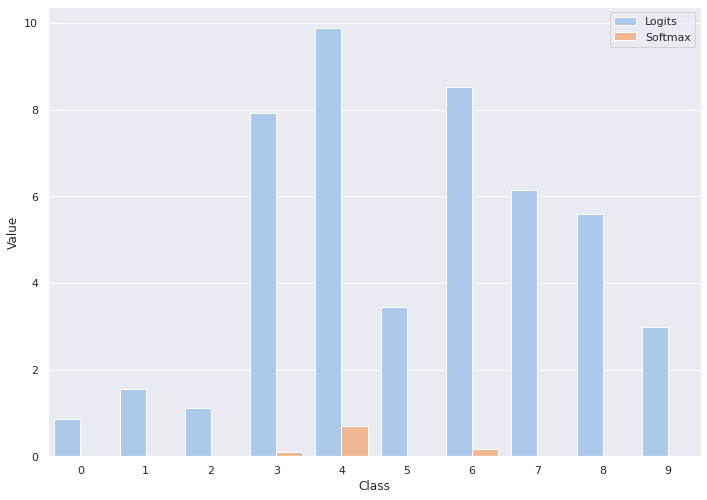

In [39]:
ax = sns.barplot(x="classes", y="value", hue="variable", data=melt_plot_data, palette="pastel")
ax.set(xlabel='Class', ylabel='Value')
ax.legend(title='', loc='upper right')
#ax.set_ylim(0.0, 1.0)

In [40]:
plot_data = pd.DataFrame()
plot_data["classes"] = [i for i in range(10)]
# plot_data["raw"] = random_dist
plot_data["Softmax"] = softmax(random_dist)
plot_data["Temperature Smoothing"] = softmax([i/10 for i in random_dist])

In [41]:
melt_plot_data = pd.melt(plot_data, id_vars="classes")
melt_plot_data.head()

,classes,variable,value
0,0,Softmax,0.000084
1,1,Softmax,0.000167
2,2,Softmax,0.000109
3,3,Softmax,0.097395
4,4,Softmax,0.694259


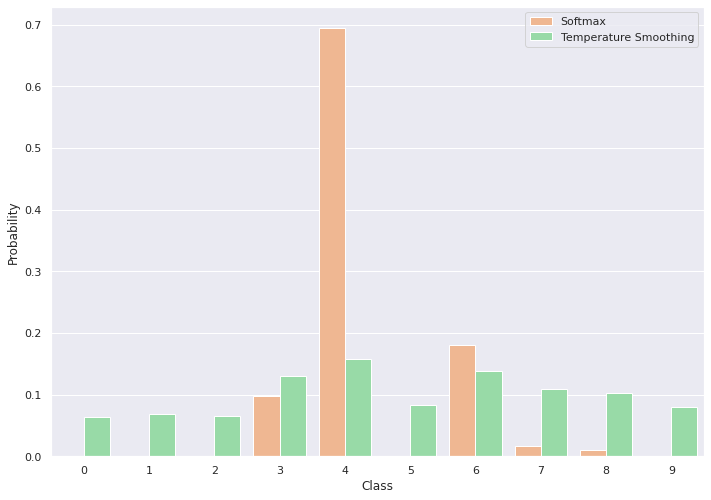

In [42]:
ax = sns.barplot(x="classes", y="value", hue="variable", data=melt_plot_data, palette=sns.color_palette("pastel")[1:])
ax.set(xlabel='Class', ylabel='Probability')
ax.legend(title='', loc='upper right')
#ax.set_ylim(0.0, 1.0)

(0.0, 0.6)

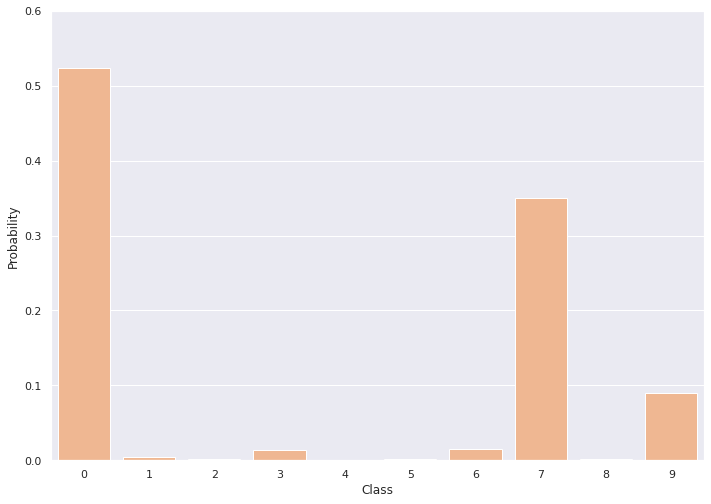

In [43]:
student = [random.uniform(0, 10) for _ in range(10)]
ax = sns.barplot(x=[i for i in range(10)], y=softmax(student), color=sns.color_palette("pastel")[1])
ax.set(xlabel='Class', ylabel='Probability')
ax.set_ylim(0.0, 0.6)

# Previous attempts

In [16]:
summary = pd.DataFrame()
summary["KD teacher"] = vanilla_df[keep_vanilla[0]]
summary["KD student"] = vanilla_df[keep_vanilla[1]]

summary["DML student0"] = dml_df[keep_dml[0]]
summary["DML student1"] = dml_df[keep_dml[1]]
summary["DML student2"] = dml_df[keep_dml[2]]

summary["DMLe student0"] = dmle_df[keep_dml[0]]
summary["DMLe student1"] = dmle_df[keep_dml[1]]
summary["DMLe student2"] = dmle_df[keep_dml[2]]

summary["Tf-KD student"] = tfkd_df[keep_vanilla[1]]


In [17]:
summary


,KD teacher,KD student,DML student0,DML student1,DML student2,DMLe student0,DMLe student1,DMLe student2,Tf-KD student
0,0.13670,0.16162,0.12734,0.14678,0.12460,0.12686,0.14688,0.12528,0.13992
1,0.25738,0.22330,0.20732,0.23140,0.24220,0.20368,0.23178,0.23884,0.24674
2,0.42450,0.37806,0.35434,0.34080,0.41990,0.37500,0.34666,0.41170,0.35770
3,0.60408,0.52332,0.59886,0.48376,0.51460,0.57350,0.47168,0.51822,0.50910
4,0.70694,0.62030,0.67874,0.60196,0.65848,0.67390,0.62320,0.65386,0.59546
...,...,...,...,...,...,...,...,...,...
95,0.89640,0.88900,0.87130,0.86752,0.86592,0.84250,0.68936,0.69612,0.88262
96,0.89664,0.88948,0.87128,0.86748,0.86596,0.84254,0.68940,0.69622,0.88248
97,0.89668,0.88898,0.87130,0.86748,0.86612,0.84224,0.68958,0.69618,0.88218
98,0.89612,0.88912,0.87124,0.86766,0.86608,0.84246,0.68964,0.69616,0.88242


In [16]:
# All the preprocessing is done above now

# summary = summary[summary['KD student'].notna()]
# summary = summary.iloc[1:]
# summary = summary.apply(pd.to_numeric)
# summary = summary.reset_index(drop=True)


In [19]:
# !pip install seaborn


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Validation Accuracy')]

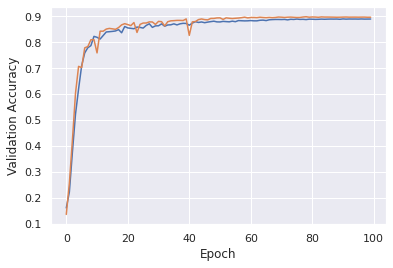

In [31]:
ax = sns.lineplot(data=summary, x=summary.index, y='KD student')
ax = sns.lineplot(data=summary, x=summary.index, y='KD teacher', ax=ax)
ax.set(xlabel='Epoch', ylabel='Validation Accuracy')


## Goal: recreate pandas plot with seaborn

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

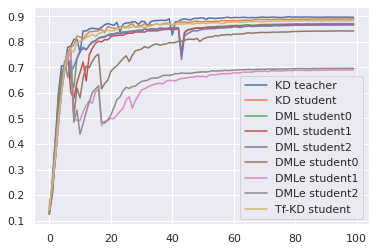

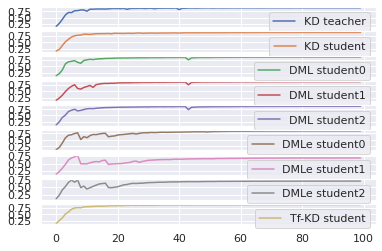

In [23]:
summary.plot.line(subplots=False)
summary.plot.line(subplots=True)


In [25]:
sns_summary = summary.copy()
sns_summary["step"] = range(100)
sns_summary = pd.melt(sns_summary, id_vars='step')
sns_summary.head()


,step,variable,value
0,0,KD teacher,0.13670
1,1,KD teacher,0.25738
2,2,KD teacher,0.42450
3,3,KD teacher,0.60408
4,4,KD teacher,0.70694


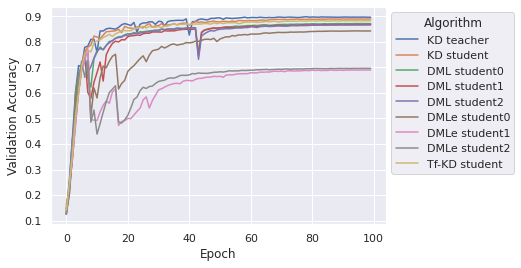

In [30]:
ax = sns.lineplot(data=sns_summary, x='step', y='value', hue='variable')
ax.set(xlabel='Epoch', ylabel='Validation Accuracy')
ax.legend(title='Algorithm', bbox_to_anchor=[1.0, 1.0])


### Success!

# What about statistical significance?

In [26]:
from scipy import stats


In [32]:
# DML and KD
t_stat, p_value = stats.ttest_rel([0.87, 0.86, 0.86, 0.88, 0.88], [
                                  0.87, 0.89, 0.89, 0.89, 0.90])


In [34]:
t_stat, p_value


(-3.086974532565159, 0.03668198940044108)

In [35]:
# DML and DML_e
t_stat, p_value = stats.ttest_rel([0.87, 0.86, 0.86, 0.88, 0.88], [
                                  0.80, 0.83, 0.84, 0.85, 0.89])


In [36]:
t_stat, p_value


(2.1864326664404867, 0.09406601105916962)

In [37]:
# DML and KD
t_stat, p_value = stats.ttest_rel([0.87, 0.88, 0.88, 0.88, 0.89], [
                                  0.87, 0.89, 0.89, 0.89, 0.90])


In [38]:
t_stat, p_value


(-4.0, 0.01613008990009254)